In [322]:
# import libraries
from music21 import *
from random import random, randint

In [323]:
# shortcut to play a stream
def play(stream):
    midi.realtime.StreamPlayer(stream).play()

# Stagnation
## Idea
A person try to get out of its current situation by *stepping up* but without success. The person inevitably fall into its starting position !
## Application
The starting position of the person is a note, the person try to *step up* using higher notes. The probability of reaching the next higher note decrements with steps: the higher you go, the more difficult it is to climb and easier it is to fall back to the starting position.

In [332]:
# durations
WHOLE = 1
HALF = 0.5
QUARTER = 0.25
EIGHTH = 0.125
SIXTEENTH = 0.06125

dur = [WHOLE, HALF, QUARTER]

In [333]:
def appendNote(index, RightHand, LeftHand, d):
    if index == 0:
        RightHand.append(note.Note("D5", quarterLength = d * 4))
        LeftHand.append(chord.Chord([note.Note("D3", quarterLength = d * 8), "F#3", "A3"]))
        RightHand.append(note.Note("E5", quarterLength = d * 4))
        #LeftHand.append(chord.Chord([note.Note("E3", quarterLength = DURATION * 4), "Ab3", "B3"]))
    elif index == 1:
        RightHand.append(note.Note("F5", quarterLength = d * 4))
        LeftHand.append(note.Rest(quarterLength = d * 4))
    elif index == 2:
        RightHand.append(note.Note("G5", quarterLength = d * 4))
        LeftHand.append(note.Rest(quarterLength = d * 4))
    elif index == 3:
        RightHand.append(note.Note("A5", quarterLength = d * 4))
        LeftHand.append(note.Rest(quarterLength = d * 4))
    elif index == 4:
        RightHand.append(note.Note("B5", quarterLength = d * 4))
        LeftHand.append(note.Rest(quarterLength = d * 4))

In [346]:
# initialize partition
RightHand = stream.Part()
RightHand.insert(0, instrument.Piano())
RightHand.append(meter.TimeSignature('4/4'))
LeftHand = stream.Part()
LeftHand.insert(0, instrument.Piano())
LeftHand.append(meter.TimeSignature('4/4'))

In [347]:
current_state = 0 # which reprensent fall

probabilities = [0.4, 0.5, 0.6, 0.7, 0.8]

In [348]:
# algorithm
appendNote(0, RightHand, LeftHand, WHOLE)
for i in range(50):
    r = random()
    d = dur[randint(0, len(dur) - 1)]
    if r < probabilities[current_state]:    
        appendNote(0, RightHand, LeftHand, d)
        current_state = 0
    elif current_state == 4:
        appendNote(4, RightHand, LeftHand, d)
    else:
        appendNote(current_state + 1, RightHand, LeftHand, d)
        current_state += 1

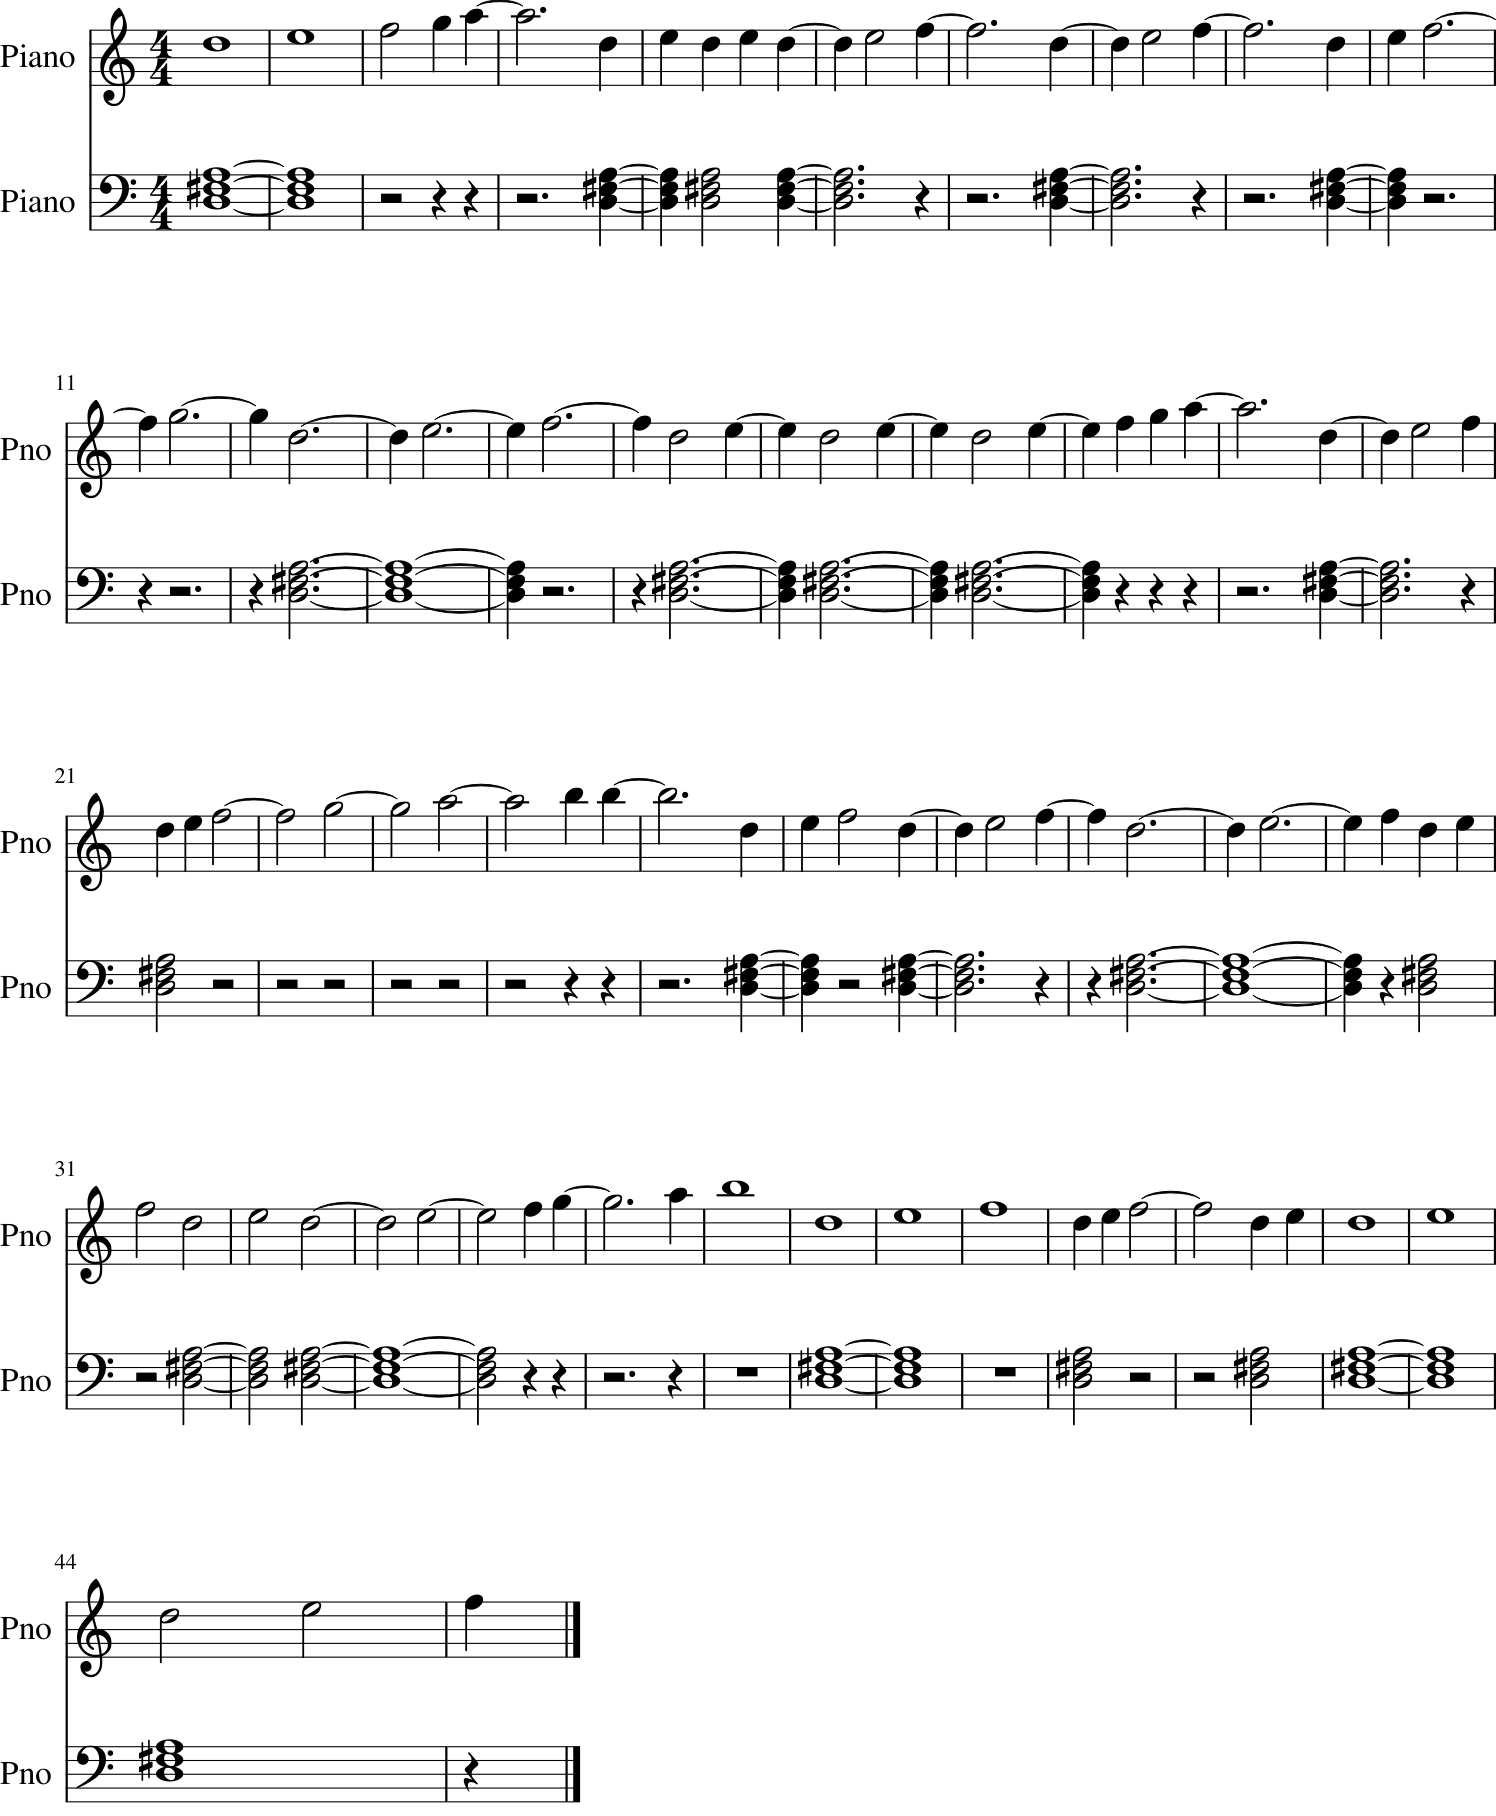

In [349]:
# put all together
s = stream.Score()
s.insert(0, RightHand)
s.insert(0, LeftHand)
s.show()
play(s)